# Importing Datasets

In [19]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load dataset

In [20]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocessing

In [21]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [22]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))

In [5]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [24]:
train_labels.sum()

38400.0

In [25]:
test_labels.sum()

10000.0

In [26]:
train_images.sum()

3935435.0

In [27]:
test_images.sum()

1038915.0

# Model

In [28]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [29]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [30]:
model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.8865 - loss: 0.3629 - val_accuracy: 0.9852 - val_loss: 0.0530
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9847 - loss: 0.0496 - val_accuracy: 0.9862 - val_loss: 0.0479
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.9905 - loss: 0.0326 - val_accuracy: 0.9898 - val_loss: 0.0390
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.9926 - loss: 0.0250 - val_accuracy: 0.9915 - val_loss: 0.0302
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9936 - loss: 0.0201 - val_accuracy: 0.9892 - val_loss: 0.0367


# Evaluation

In [31]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9874 - loss: 0.0327

Test accuracy: 0.9900000095367432


In [32]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


# Sample output

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{predicted_label} ({100*np.max(predictions_array):2.0f}%) (True: {true_label})", color=color)


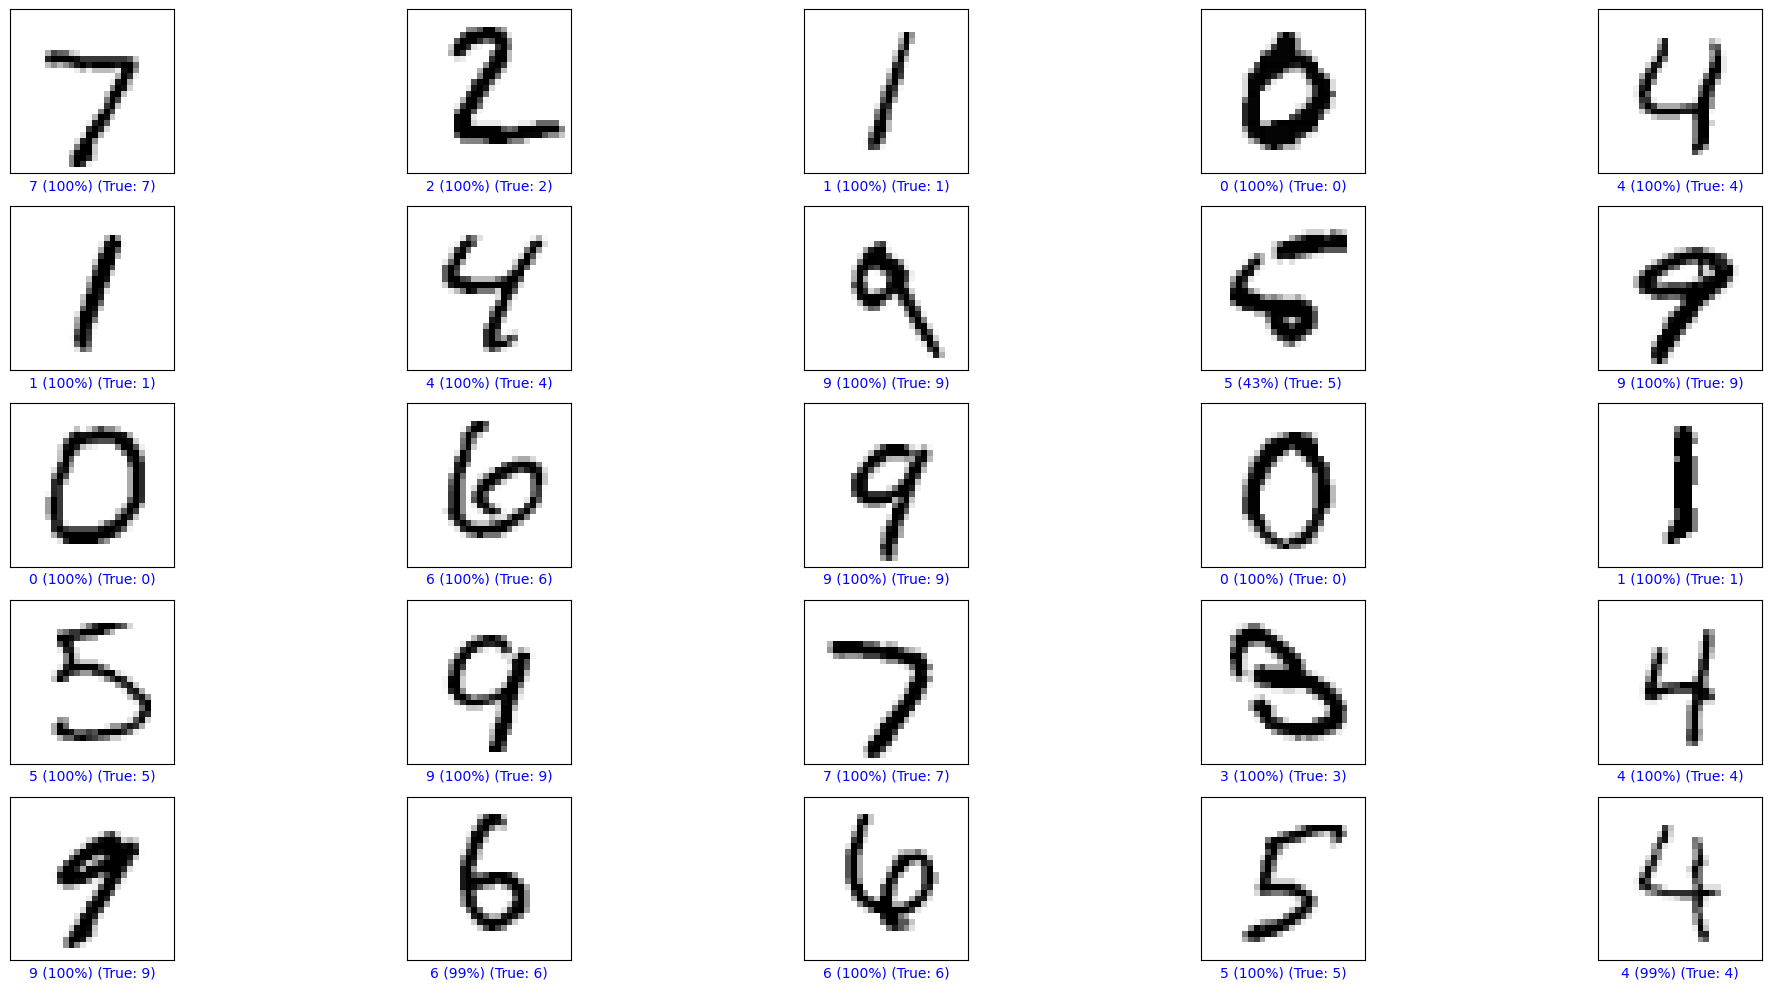

In [34]:
num_rows, num_cols = 5, 5
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, y_test, x_test)
plt.tight_layout()
plt.show()